<a href="https://colab.research.google.com/github/JustinShawAcademy/Machine-Learning-Zoomcamp/blob/main/02_MLZ_regression_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.__version__

'2.2.2'

In [ ]:
import numpy as np
np.__version__

'2.0.2'

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [ ]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_subset = df[cols]
df_subset

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


## EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

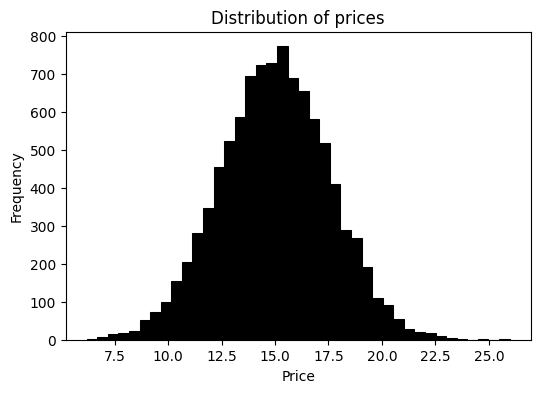

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

sns.histplot(df_subset['fuel_efficiency_mpg'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()
# no

## Question 1
There's one column with missing values. What is it?

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'


In [ ]:
df_subset.isnull().sum()
# 'horsepower'

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


## Question 2
What's the median (50% percentile) for variable 'horsepower'?

- 49
- 99
- 149
- 199

In [ ]:
df_subset['horsepower'].median()

149.0

## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [ ]:
np.random.seed(42)

n = len(df_subset)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print(
    f"n_val   = {n_val}\n"
    f"n_test  = {n_test}\n"
    f"n_train = {n_train}\n"
    f"Total   = {n_val + n_test + n_train} (n = {n})"
)

n_val   = 1940
n_test  = 1940
n_train = 5824
Total   = 9704 (n = 9704)


In [ ]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_subset.iloc[idx]
df_shuffled.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [ ]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
y_train_orig = df_train['fuel_efficiency_mpg'].values
y_val_orig = df_val['fuel_efficiency_mpg'].values
y_test_orig = df_test['fuel_efficiency_mpg'].values

# log version
# y_train = np.log1p(df_train['fuel_efficiency_mpg'].values)
# y_val = np.log1p(df_val['fuel_efficiency_mpg'].values)
# y_test = np.log1p(df_test['fuel_efficiency_mpg'].values)

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

# We do this because we don't want to use msrp as a feature to predict msrp.
# It's a good practice as we don't want to use for training purposes
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [ ]:
# linear regression trainer
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [ ]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'] # removed 'fuel_efficiency_mpg' from cols
X_train = df_train[cols]

In [ ]:
X_train.isnull().sum()

,0
engine_displacement,0
horsepower,429
vehicle_weight,0
model_year,0


In [ ]:
mean_values = X_train.mean()

X_train_fillna_0 = X_train.fillna(0)
X_train_fillna_mean = X_train.fillna(mean_values)

In [ ]:
w0_fill_0, w_fill_0 = train_linear_regression(X_train_fillna_0, y_train)
w0_fill_0, w_fill_0

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [ ]:
w0_fill_mean, w_fill_mean = train_linear_regression(X_train_fillna_mean, y_train)
w0_fill_mean, w_fill_mean

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [ ]:
# now we need to now use our vaildation data to find the rmse (root mean square error)